In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2022/data.csv


In [ ]:
df = pd.read_csv('../input/tabular-playground-series-jun-2022/data.csv')

In [ ]:
sub = pd.read_csv('../input/tabular-playground-series-jun-2022/sample_submission.csv', index_col='row-col')

In [ ]:
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


## Pre-processing steps

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

<AxesSubplot:>

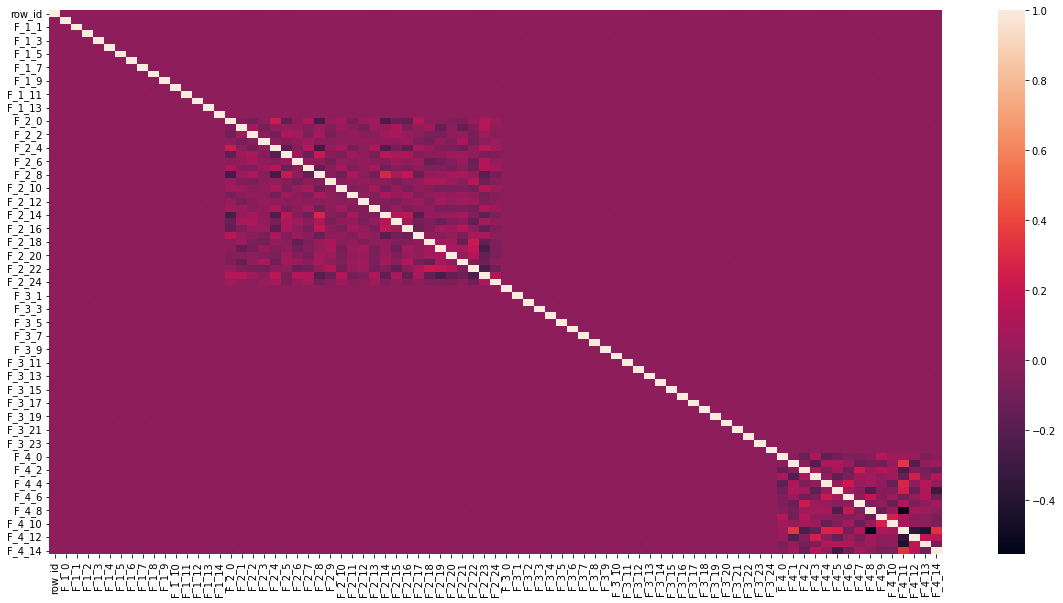

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr())

In [ ]:
l =  df.iloc[:,16:41].columns

In [ ]:
sub.head()

,value
row-col,
0-F_1_14,0.0
0-F_3_23,0.0
1-F_3_24,0.0
2-F_1_2,0.0
2-F_4_2,0.0


In [ ]:
df.drop('row_id', axis = 1, inplace = True)

In [ ]:
d = df.copy()

In [ ]:
df.shape

(1000000, 80)

Iterative Imputer initially initializes the missing values with the value passed for initial_strategy , where the initial strategy is the “mean” for each feature. The imputer then uses an estimator (where the default estimator used is Bayesian Ridge) at each step of the round-robin imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost

In [ ]:

reg_imputer = IterativeImputer(estimator=
                               xgboost.XGBRegressor(n_estimators=500, 
                                       tree_method='gpu_hist', 
                                       predictor="gpu_predictor",
                                       eval_metric=mean_squared_error),
                               verbose=2,
                               max_iter=5)
df = pd.DataFrame( reg_imputer.fit_transform(df),columns = df.columns)

[IterativeImputer] Completing matrix with shape (1000000, 80)
[IterativeImputer] Ending imputation round 1/5, elapsed time 776.25
[IterativeImputer] Change: 24.052763350008938, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/5, elapsed time 1554.33
[IterativeImputer] Change: 7.567135870456696, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/5, elapsed time 2331.00
[IterativeImputer] Change: 5.094375878572464, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/5, elapsed time 3110.17
[IterativeImputer] Change: 5.473332017660141, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/5, elapsed time 3889.42
[IterativeImputer] Change: 4.93287467956543, scaled tolerance: 0.031229363 


/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
# from tqdm import tqdm
# pred = []
# from xgboost import XGBRegressor
# for n, i in enumerate(tqdm(df.columns[65:])):
#     if i not in l:
#         y_t = df[df[i].isnull()][i]
#         y_train = df[~df[i].isnull()][i]
#         x_train = df[~df[i].isnull()].drop(i, axis =1)
#         x_t = df[df[i].isnull()].drop(i, axis =1)
#         xgb = XGBRegressor(tree_method='gpu_hist', predictor= "gpu_predictor", n_estimators = 750)
#         xgb.fit(x_train, y_train)
#         d.iloc[d[d[i].isnull()].iloc[:,65+n].index, 65+n] = xgb.predict(x_t)
        

In [ ]:
# for n, i in enumerate(tqdm(df.columns[:65])):
#     if i not in l:
#         y_t = df[df[i].isnull()][i]
#         y_train = df[~df[i].isnull()][i]
#         x_train = df[~df[i].isnull()].drop(i, axis =1)
#         x_t = df[df[i].isnull()].drop(i, axis =1)
#         xgb = XGBRegressor(tree_method='gpu_hist', predictor= "gpu_predictor", n_estimators = 750)
#         xgb.fit(x_train, y_train)
#         d.iloc[d[d[i].isnull()].iloc[:,n].index, n] = xgb.predict(x_t)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 80 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   F_1_0   1000000 non-null  float64
 1   F_1_1   1000000 non-null  float64
 2   F_1_2   1000000 non-null  float64
 3   F_1_3   1000000 non-null  float64
 4   F_1_4   1000000 non-null  float64
 5   F_1_5   1000000 non-null  float64
 6   F_1_6   1000000 non-null  float64
 7   F_1_7   1000000 non-null  float64
 8   F_1_8   1000000 non-null  float64
 9   F_1_9   1000000 non-null  float64
 10  F_1_10  1000000 non-null  float64
 11  F_1_11  1000000 non-null  float64
 12  F_1_12  1000000 non-null  float64
 13  F_1_13  1000000 non-null  float64
 14  F_1_14  1000000 non-null  float64
 15  F_2_0   1000000 non-null  float64
 16  F_2_1   1000000 non-null  float64
 17  F_2_2   1000000 non-null  float64
 18  F_2_3   1000000 non-null  float64
 19  F_2_4   1000000 non-null  float64
 20  F_2_5   1000000 non-null 

In [ ]:
for i in sub.index:
    row = int(i.split('-')[0])
    col = i.split('-')[1]
    sub.loc[i, 'value'] = df.loc[row, col]

sub.to_csv('mean_benchmark.csv')